# **Практическая работа по линейной регрессии**

# **Импорт библиотек**

In [1]:
# Библиотека для продвинутой работы с многомерными массивами данных
import numpy as np

# Библиотека для простой визуализации данных
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 8    # Стандартные размеры графиков
plt.rcParams['axes.grid'] = True            # Сетка графика
plt.pink()                                  # Цветовая схема при раскраске

# Работа с таблицами данных
import pandas as pd

# Машинное обучение
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split                    # Деление датасета
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV     # Модели регрессии
from sklearn.metrics import r2_score, mean_absolute_error               # Метрики качества регрессии

c_pallete = ['#DC143C',   # Crimson
             '#00FA9A',   # MediumSpringGreen
             '#FF1493',   # DeepPink
             '#20B2AA',   # LightSeaGreen
             '#1E90FF',   # DodgerBlue
             '#FFD700',   # Gold
             '#00008B',   # DarkBlue
             '#4B0082',   # Indigo
             '#008080']   # Teal

<Figure size 1000x800 with 0 Axes>

# **Задачи для самостоятельного выполнения**

## **Задача №1. Реализация линейной регрессии**

1. Реализовать функцию для нахождения параметров линейной модели регрессии на одну переменную любым удобным методом (*аналитическое решение*,*градиентный спуск*, *нормальное уравнение*). 

$$
\hat{y}(x) = a\cdot x + b
$$

Сигнатура функции:


In [ ]:
# На месте *args и **kwargs расположите необходимое количество аргументов 
from statistics import mean
def single_LM(x_vec, y_vec, *args, **kwargs):
  a, b = 0.0, 0.0
  x_sht, y_sht, xy_sht, x2_sht  = mean(x_vec), mean(y_vec), mean(x_vec*y_vec), mean(x_vec**2)
  a = (xy_sht - x_sht*y_sht)/(x2_sht - x_sht**2)
  b = y_sht - a*x_sht
  return a, b

2. Реализовать функцию решения задачи многопараметрической линейной регрессии на основе матрицы входных данных также любым удобным для вас способом.

$$
\hat{y}(x) = p_0 + p_1 \cdot x_1 + p_2 \cdot x_2 + \dots + p_n \cdot x_n,
$$

где $x_i, i = 1, 2 \dots, n\ -$ параметры-столбцы матрицы данных $X$, а $p_i\ -$ параметры модели.

In [ ]:
# На месте  *args и **kwargs расположите необходимое количество аргументов 
import numpy as np
def multiple_LM(X_matrix, y_vec, *args, **kwargs):
  params = np.zeros(X_matrix.shape[1])
  params = np.linalg.inv(X_matrix.transpose() @ X_matrix) @ X_matrix.transpose() @ y_vec 
  return (X_matrix @ params).reshape(-1)

3. На базе метода многопараметрической регерссии реализовать функцию нахождения коэффициентов полиномиальной регресии на одну переменную по принципу формирования 
[матрицы Вандермонда](https://dic.academic.ru/dic.nsf/ruwiki/425350):

$$
\hat{y}(x) = p_0 + p_1 \cdot x + p_2 \cdot x^2 + \dots + p_n \cdot x^n
$$

In [ ]:
# На месте  *args и **kwargs расположите необходимое количество аргументов 
def poly_regression(x_vec, y_vec, degree = 5, *args, **kwargs):
  X_matrix = list()
  x_pr = np.ones((len(x_vec), 1))
  for i in range(1, degree+2):
    np.append(x_pr, x_vec**i)
    X_matrix.append(x_pr.reshape(-1, 1))
    x_pr = np.empty(len(x_vec))
  params = multiple_LM(np.hstack(X_matrix), y_vec)
  return params

4. Проверить на исходных данных отклика $y$ с одной переменной $x$ несколько моделей регрессии. 

- Построить линейную модель регрессии, оценить её коэффициенты.
- Построить для $m = 2, 3, 4, 5, 6, 7, 8$ степеней модели полиномиальной регрессии

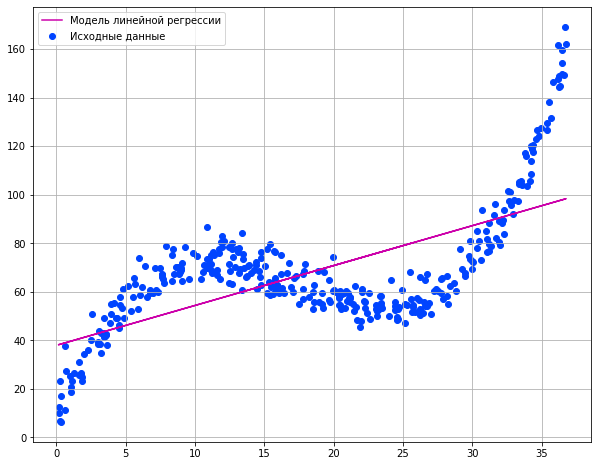

In [ ]:
# Загрузка тренировочных данных
import numpy as np 
train_data = pd.read_csv("https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/data_regr_train.csv")
x_vec = np.array(train_data["x"])
y_vec = np.array(train_data["y"])

a_train, b_train =  single_LM(x_vec, y_vec)
y_model = a_train * x_vec + b_train                                
plt.scatter(x_vec, y_vec, c = "#0044FF", label = "Исходные данные")
plt.plot(x_vec, y_model, c = "#CC00AA", label = "Модель линейной регрессии") 
plt.legend()  
plt.show()   

5. Для каждой из оцененных моделей линейной и полиномиальной регрессии провести вычисление метрики $R^2$ на тестовых данных. Объясните поведение метрики при повышении степени модели регрессии

In [ ]:
pred_po = poly_regression(x_test, y_test, degree = 8) 
print(f"Коэффициент детерминации для poly8 R^2 = {det_coeff(y_test, pred_po)}")

Коэффициент детерминации для poly8 R^2 = 0.9392013730904623


In [ ]:
# Реализовать вычисления коэффициента детерминации
import numpy as np
def det_coeff(y, y_hat):
  return 1 - sum((y - y_hat)**2) / sum((y - np.mean(y))**2)

# Тестовые данные
test_data = pd.read_csv("https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/data_regr_test.csv")
x_test = np.array(test_data["x"])
y_test = np.array(test_data["y"])
N = len(x_test)
X_matrix = np.hstack([np.ones((N, 1)), x_test.reshape(-1, 1)]) 
x2_test = np.power(x_test, 2)
x3_test = np.power(x_test, 3)
x4_test = np.power(x_test, 4)
x5_test = np.power(x_test, 5)
x6_test = np.power(x_test, 6)
x7_test = np.power(x_test, 7)
x8_test = np.power(x_test, 8)
# Оценка зависимости на неизвестных значениях при обучении
pred_linear = multiple_LM(X_matrix, y_test)
X_matrix = np.hstack([np.ones((N, 1)), x_test.reshape(-1, 1), x2_test.reshape(-1, 1)])
pred_poly2 = multiple_LM(X_matrix, y_test)
X_matrix = np.hstack([np.ones((N, 1)), x_test.reshape(-1, 1), x2_test.reshape(-1, 1), x3_test.reshape(-1, 1)])
pred_poly3 = multiple_LM(X_matrix, y_test)
X_matrix = np.hstack([np.ones((N, 1)), x_test.reshape(-1, 1), x2_test.reshape(-1, 1), x3_test.reshape(-1, 1), x4_test.reshape(-1, 1)])
pred_poly4 = multiple_LM(X_matrix, y_test)
X_matrix = np.hstack([np.ones((N, 1)), x_test.reshape(-1, 1), x2_test.reshape(-1, 1), x3_test.reshape(-1, 1), x4_test.reshape(-1, 1), x5_test.reshape(-1, 1)])
pred_poly5 = multiple_LM(X_matrix, y_test)
X_matrix = np.hstack([np.ones((N, 1)), x_test.reshape(-1, 1), x2_test.reshape(-1, 1), x3_test.reshape(-1, 1), x4_test.reshape(-1, 1), x5_test.reshape(-1, 1), x6_test.reshape(-1, 1)])
pred_poly6 = multiple_LM(X_matrix, y_test)
X_matrix = np.hstack([np.ones((N, 1)), x_test.reshape(-1, 1), x2_test.reshape(-1, 1), x3_test.reshape(-1, 1), x4_test.reshape(-1, 1), x5_test.reshape(-1, 1), x6_test.reshape(-1, 1), x7_test.reshape(-1, 1)])
pred_poly7 = multiple_LM(X_matrix, y_test)
X_matrix = np.hstack([np.ones((N, 1)), x_test.reshape(-1, 1), x2_test.reshape(-1, 1), x3_test.reshape(-1, 1), x4_test.reshape(-1, 1), x5_test.reshape(-1, 1), x6_test.reshape(-1, 1), x7_test.reshape(-1, 1), x8_test.reshape(-1, 1)])
pred_poly8 = multiple_LM(X_matrix, y_test)
# Коэффициенты R^2
print(f"Коэффициент детерминации для линейной модели R^2 = {det_coeff(y_test, pred_linear)}")
print(f"Коэффициент детерминации для poly2 R^2 = {det_coeff(y_test, pred_poly2)}")
print(f"Коэффициент детерминации для poly3 R^2 = {det_coeff(y_test, pred_poly3)}")
print(f"Коэффициент детерминации для poly4 R^2 = {det_coeff(y_test, pred_poly4)}")
print(f"Коэффициент детерминации для poly5 R^2 = {det_coeff(y_test, pred_poly5)}")
print(f"Коэффициент детерминации для poly6 R^2 = {det_coeff(y_test, pred_poly6)}")
print(f"Коэффициент детерминации для poly7 R^2 = {det_coeff(y_test, pred_poly7)}")
print(f"Коэффициент детерминации для poly8 R^2 = {det_coeff(y_test, pred_poly8)}")

Коэффициент детерминации для линейной модели R^2 = 0.18857415677788336
Коэффициент детерминации для poly2 R^2 = 0.2778092345800095
Коэффициент детерминации для poly3 R^2 = 0.9358288128849407
Коэффициент детерминации для poly4 R^2 = 0.9368691743463036
Коэффициент детерминации для poly5 R^2 = 0.9387589918491063
Коэффициент детерминации для poly6 R^2 = 0.9389876667404427
Коэффициент детерминации для poly7 R^2 = 0.9390875194655413
Коэффициент детерминации для poly8 R^2 = 0.9392013730904623


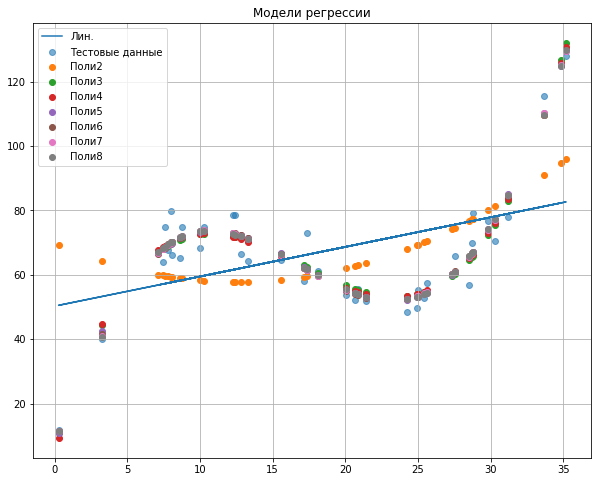

In [ ]:
plt.figure(figsize = (10, 8))
plt.title("Модели регрессии")
plt.scatter(x = x_test, y = y_test, label = "Тестовые данные", alpha = 0.6)
plt.plot(x_test, pred_linear, label = "Лин.")
plt.scatter(x_test, pred_poly2, label = "Поли2")
plt.scatter(x_test, pred_poly3, label = "Поли3")
plt.scatter(x_test, pred_poly4, label = "Поли4")
plt.scatter(x_test, pred_poly5, label = "Поли5")
plt.scatter(x_test, pred_poly6, label = "Поли6")
plt.scatter(x_test, pred_poly7, label = "Поли7")
plt.scatter(x_test, pred_poly8, label = "Поли8")
plt.legend()
plt.show()

6. Для лучшей модели реализуйте простую проверку остатков на одно из известных распределений.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 5.,  8., 13.,  6.,  5.,  3.]),
 array([-1.80451843, -1.10723726, -0.4099561 ,  0.28732506,  0.98460623,
         1.68188739,  2.37916855]),
 <a list of 6 Patch objects>)

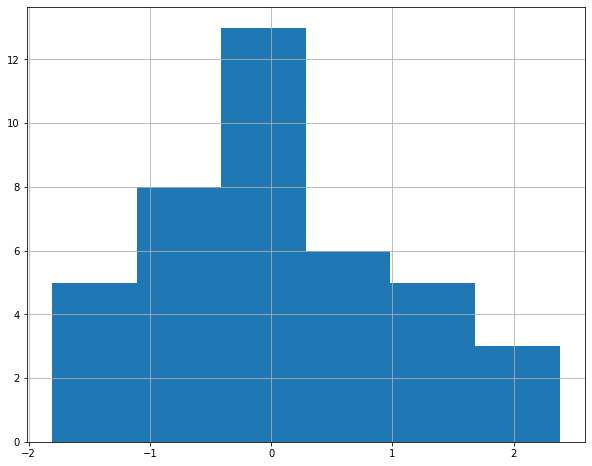

In [ ]:
errors = y_test - pred_poly8
errors_norm = errors[np.abs(errors) < 4 * np.std(errors)]
n_groups = 1 + np.int(np.log2(len(errors_norm)))
z_errors = (errors_norm - np.mean(errors_norm)) / np.std(errors_norm)
plt.hist(z_errors, bins = n_groups)

## ***Задача №3. Восстановление зависимости**

Данные в таблице:

1. Дата замера
2. Ртр МПа 	- давление в трубе в МегаПаскалях
3. Туст °С - температура установки в градусах цельсия
4. газ м3/сут	- скорость добычи газа в сутки в кубических метрах
5. конд-т м3/сут - скорость побочной добычи конденсата в сутки в кубических метрах
6. вода м3/сут - скорость добычи воды в сутки в кубических метрах
7. ID - номер скважины
8. Куст - наименование группы скважин
9. Группа - географическое место расположения кустов и скважин

Задача состоит в том, чтобы восстановить пропущенные значения исходного ряда данных на основе линейной регрессии.

1. Импортировать данные в Python из внешнего источника данных

In [2]:
GAZ_data = pd.read_csv("https://raw.githubusercontent.com/qwerty29544/RpracticeBook/master/2Data/01FlatTables/GAZ.csv",
                       sep = "\t", decimal = ',').drop(['Куст', 'Группа'], axis=1)
GAZ_data.isna().sum()

дата замера        0
Ртр МПа           58
Туст °С          125
газ м3/сут         3
конд-т м3/сут     24
вода м3/сут       24
ID                 0
dtype: int64

In [3]:
GAZ_data['дата замера']

0         12/5/2015
1        13/05/2015
2        16/05/2015
3        20/05/2015
4        26/05/2015
            ...    
28157    18/04/2019
28158    19/04/2019
28159     11/5/2019
28160    22/05/2019
28161    23/05/2019
Name: дата замера, Length: 28162, dtype: object

2. Перевести колонку данных "дата замера" в формат дата и время

In [4]:
GAZ_data['дата замера'] = pd.to_datetime(GAZ_data['дата замера'])
GAZ_data

<ipython-input-4-c42b856f9555>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  GAZ_data['дата замера'] = pd.to_datetime(GAZ_data['дата замера'])


,дата замера,Ртр МПа,Туст °С,газ м3/сут,конд-т м3/сут,вода м3/сут,ID
0,2015-12-05,15.5,NaN,771912.0,NaN,NaN,110
1,2015-05-13,150.0,73.4,827421.0,NaN,NaN,110
2,2015-05-16,16.7,71.0,443574.0,NaN,NaN,110
3,2015-05-20,17.9,66.0,304479.0,NaN,NaN,110
4,2015-05-26,17.5,70.0,361939.0,2.72,2.44,110
...,...,...,...,...,...,...,...
28157,2019-04-18,2.6,55.0,125760.0,0.40,2.10,1043
28158,2019-04-19,2.6,55.0,125500.0,0.40,3.00,1043
28159,2019-11-05,2.6,55.0,124100.0,0.30,2.80,1043
28160,2019-05-22,2.6,56.0,123902.0,0.00,2.98,1043


3. Заполнить пропущенные данные в столбцах

In [5]:
GAZ_data_copy = GAZ_data.copy()
num_col = GAZ_data_copy.select_dtypes(include=np.number).columns.tolist()
for i in num_col:
  GAZ_data_copy[f'{i}'] = GAZ_data_copy[f'{i}'].fillna(method='backfill')

In [6]:
GAZ_data_copy.isna().sum()

дата замера      0
Ртр МПа          0
Туст °С          0
газ м3/сут       0
конд-т м3/сут    0
вода м3/сут      0
ID               0
dtype: int64

4. Проверить значения в столбцах на выбросы с помощью графика ящик с усами. При наличии выбросов скорректировать их любым способом

In [7]:
import seaborn as sns

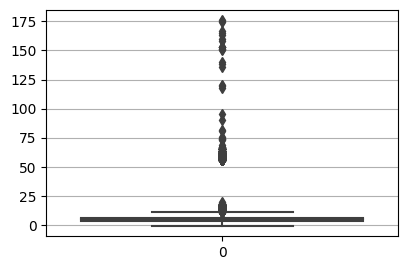

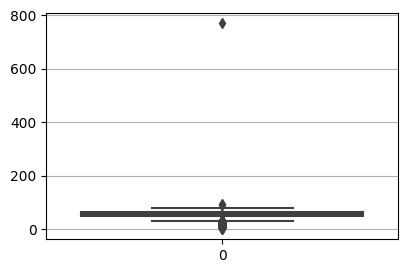

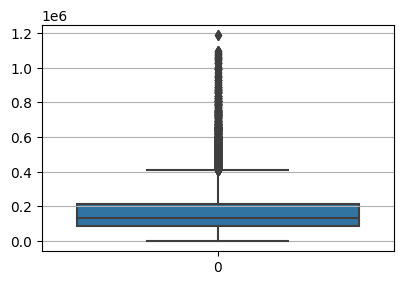

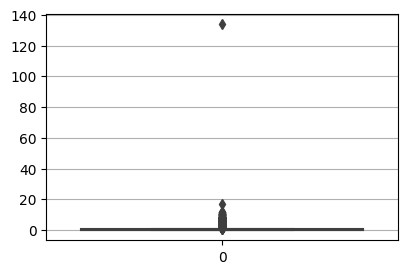

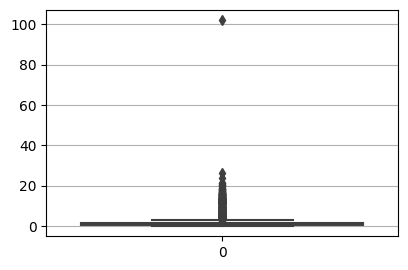

In [10]:
for i in num_col:
  plt.figure(figsize=(10, 10))
  plt.subplot(3, 2, 1)
  sns.boxplot(GAZ_data_copy[i])

In [11]:
index_u = []
index_l = []
for i in num_col:
  Q1 = np.percentile(GAZ_data_copy[f"{i}"], 25, interpolation = 'midpoint')
  Q3 = np.percentile(GAZ_data_copy[f"{i}"], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1 
  upper = GAZ_data_copy[f"{i}"] >= (Q3+1.5*IQR)
  lower = GAZ_data_copy[f"{i}"] <= (Q1-1.5*IQR)
  index_u.append(np.where(upper)[0].tolist())
  index_l.append(np.where(lower)[0].tolist()) 
index_u = list(set(j for i in index_u for j in i))
index_l = list(set(j for i in index_l for j in i))
index = []
index.append(index_u) 
index.append(index_l)
index = list(set(j for i in index for j in i))

<ipython-input-11-fa5846e38940>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(GAZ_data_copy[f"{i}"], 25, interpolation = 'midpoint')
<ipython-input-11-fa5846e38940>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(GAZ_data_copy[f"{i}"], 75, interpolation = 'midpoint')


In [12]:
GAZ_data_copy1 = GAZ_data_copy.drop(index)

In [13]:
GAZ_data_copy1

,дата замера,Ртр МПа,Туст °С,газ м3/сут,конд-т м3/сут,вода м3/сут,ID
55,2016-04-12,8.7,70.0,331845.0,0.490,2.370,110
57,2016-12-29,7.8,70.0,340.1,0.908,0.067,110
60,2017-02-02,9.0,66.6,242567.5,0.700,1.700,110
61,2017-08-03,8.5,67.6,249888.9,0.392,1.616,110
62,2017-11-03,8.7,66.0,224900.0,0.600,1.200,110
...,...,...,...,...,...,...,...
28157,2019-04-18,2.6,55.0,125760.0,0.400,2.100,1043
28158,2019-04-19,2.6,55.0,125500.0,0.400,3.000,1043
28159,2019-11-05,2.6,55.0,124100.0,0.300,2.800,1043
28160,2019-05-22,2.6,56.0,123902.0,0.000,2.980,1043


5. Выбрать любой id куста и сформировать по данному id подвыборку данных той же структуры

In [14]:
first_date = GAZ_data_copy1['дата замера'].min()
GAZ_data_copy1['кол-во лет'] = (GAZ_data_copy1['дата замера'] - first_date).dt.days / 365
GAZ_data_copy1

,дата замера,Ртр МПа,Туст °С,газ м3/сут,конд-т м3/сут,вода м3/сут,ID,кол-во лет
55,2016-04-12,8.7,70.0,331845.0,0.490,2.370,110,5.334247
57,2016-12-29,7.8,70.0,340.1,0.908,0.067,110,6.049315
60,2017-02-02,9.0,66.6,242567.5,0.700,1.700,110,6.145205
61,2017-08-03,8.5,67.6,249888.9,0.392,1.616,110,6.643836
62,2017-11-03,8.7,66.0,224900.0,0.600,1.200,110,6.895890
...,...,...,...,...,...,...,...,...
28157,2019-04-18,2.6,55.0,125760.0,0.400,2.100,1043,8.350685
28158,2019-04-19,2.6,55.0,125500.0,0.400,3.000,1043,8.353425
28159,2019-11-05,2.6,55.0,124100.0,0.300,2.800,1043,8.901370
28160,2019-05-22,2.6,56.0,123902.0,0.000,2.980,1043,8.443836


In [ ]:
for i in GAZ_data_copy1['ID'].unique():
  print(i, len(GAZ_data_copy1.query(f"ID == '{i}'").copy().reset_index()))

110 83
111 65
112 21
113 125
114 59
115 74
118 13
100 66
101 102
105 129
109 83
102 575
103 93
106 23
107 8
162 482
163 12
165 19
1044 133
1045 116
1046 75
1047 103
1048 108
1049 59
1050 170
1051 85
1052 96
1053 77
1054 90
1008 466
1009 391
1010 29
1011 475
1012 537
1013 496
1015 481
1018 495
1055 355
1056 339
1014 207
1016 84
1019 584
1023 529
1017 606
1020 602
1021 548
1057 423
161 455
171 446
173G 505
1025 71
1026 430
17B 544
18B 597
20B 559
302 540
242 576
1027 765
1058 550
301 593
1022 831
1024 383
305 180
306 59
1030 116
1031 172
1081 198
1035 23
1036 331
1038 92
1039 93
1034 308
1037 304
1040 308
1041 292
1042 403
1043 36


In [ ]:
GAZ = GAZ_data_copy1.query("ID == '17B'").copy().reset_index()
GAZ

,index,дата замера,Ртр МПа,Туст °С,газ м3/сут,конд-т м3/сут,вода м3/сут,ID,кол-во лет
0,16853,2010-12-13,6.4,48.7,247620.2,0.614,0.306,17B,0.000000
1,16854,2011-04-01,6.2,48.6,239202.1,0.634,0.419,17B,0.298630
2,16855,2011-01-29,6.3,49.3,233614.3,0.557,1.088,17B,0.128767
3,16871,2011-08-14,6.6,51.7,201726.2,0.801,0.093,17B,0.668493
4,16872,2011-09-16,6.1,47.9,221409.3,0.593,0.797,17B,0.758904
...,...,...,...,...,...,...,...,...,...
539,17422,2019-02-05,2.3,48.0,67150.0,0.108,0.794,17B,8.153425
540,17423,2019-09-05,2.3,48.0,66400.0,0.100,0.671,17B,8.734247
541,17424,2019-10-05,2.3,48.0,66700.0,0.107,0.865,17B,8.816438
542,17425,2019-05-17,2.3,48.0,66800.0,0.000,0.172,17B,8.430137


6. Визуализировать данные числовых переменных в столбцах для куста от времени. Сформировать предположения о нелинейной модели переменных от времени.

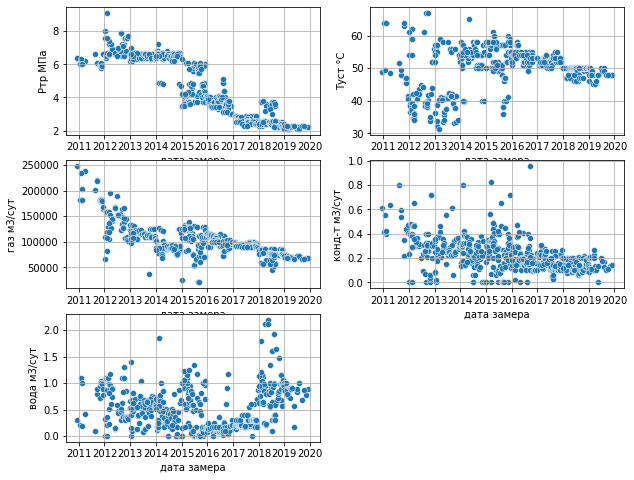

In [ ]:
for i in range(len(num_col)):
  plt.subplot(3, 2, i + 1)
  sns.scatterplot(data=GAZ, x='дата замера', y=num_col[i])

In [ ]:
dates = pd.Series(pd.date_range(GAZ['дата замера'].min(), pd.to_datetime('today')))
dates = dates[~dates.isin(GAZ['дата замера'])]

7. Обучить модель нелинейной регрессии для каждой переменной от времени. Получить параметры регрессии каждой переменной. (Можно использовать полиномиальные модели и/или экспоненциальные модели на основе метода анаморфоз)

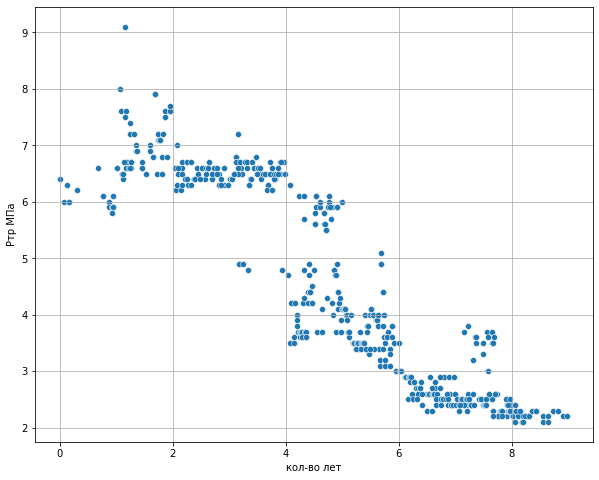

In [ ]:
X = GAZ[['кол-во лет']].copy()
y = GAZ['Ртр МПа'].copy()
sns.scatterplot(x=X['кол-во лет'], y=y);

In [ ]:
X['cub'] = X['кол-во лет']**3
X['exp'] = np.exp(-X['кол-во лет'])
X['qrt'] = np.sqrt(X['кол-во лет'])

In [ ]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X[['cub', 'exp', 'qrt']], y)

LinearRegression(n_jobs=-1)

0.8729318330342691


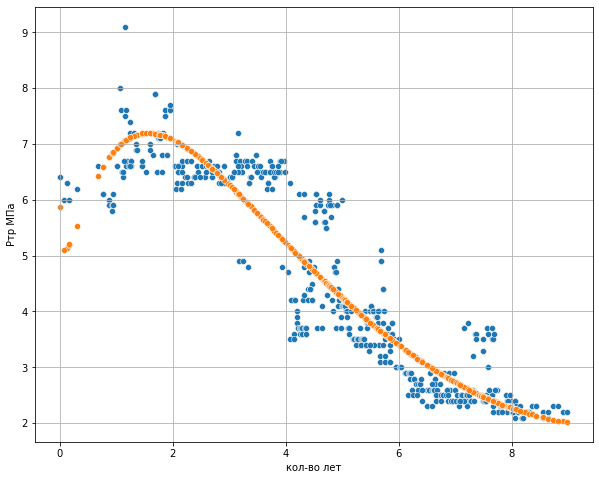

In [ ]:
print(lr.score(X[['cub', 'exp', 'qrt']], y))
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=X['кол-во лет'], y=lr.predict(X[['cub',  'exp', 'qrt']]))

In [ ]:
Gaz_full = pd.DataFrame(dates, columns=['дата'])
Gaz_full['дата'] = (Gaz_full['дата'] - first_date).dt.days / 365

In [ ]:
Gaz_full['cub'] = Gaz_full['дата']**3
Gaz_full['exp'] = np.exp(-Gaz_full['дата'])
Gaz_full['qrt'] = np.sqrt(Gaz_full['дата'])
y_full = lr.predict(Gaz_full[['cub', 'exp', 'qrt']])

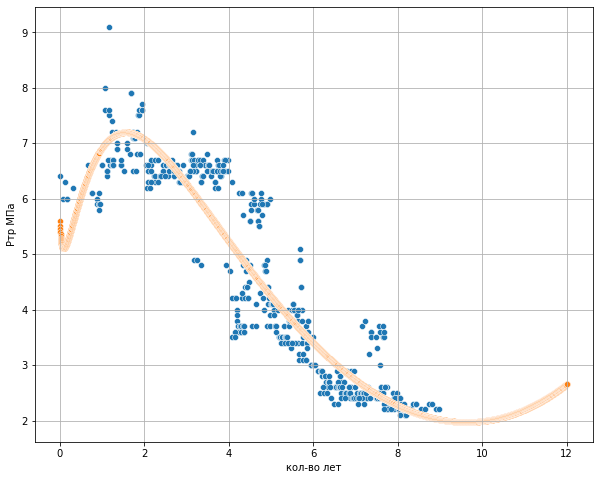

In [ ]:
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=Gaz_full['дата'], y=y_full);

In [ ]:
print('Ртр МПА сегодня:', y_full[-1].round(3))

Ртр МПА сегодня: 2.66


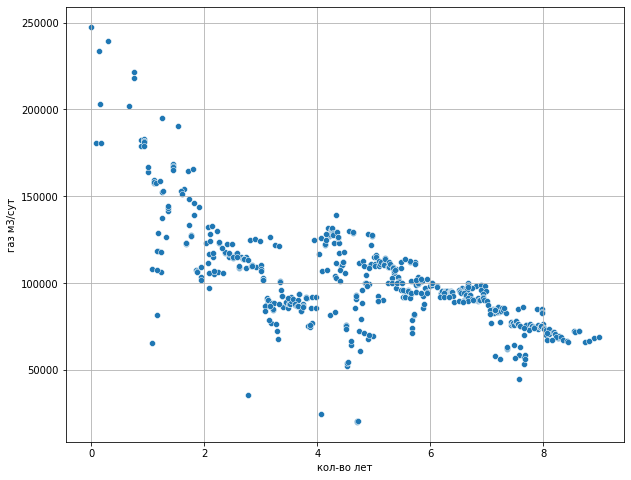

In [ ]:
X = GAZ[['кол-во лет']].copy()
y = GAZ['газ м3/сут'].copy()
sns.scatterplot(x=X['кол-во лет'], y=y)

In [ ]:
X['exp'] = np.exp(-X['кол-во лет'])
X['tan'] = np.tanh(X['кол-во лет'])
X['qrt'] = np.sqrt(X['кол-во лет'])

0.6089683440177113


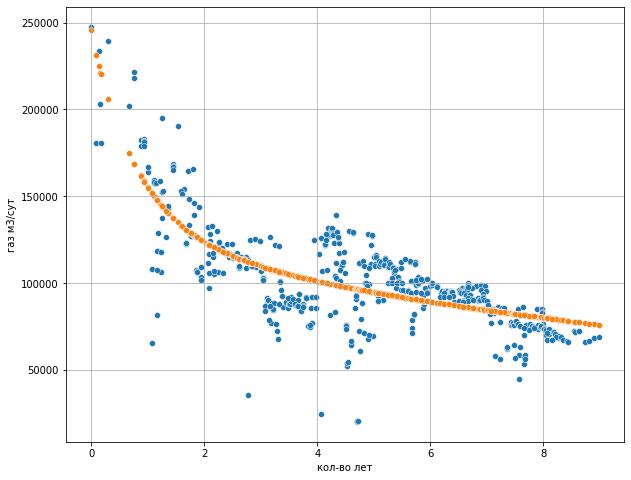

In [ ]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X[['exp', 'tan', 'qrt']], y)
print(lr.score(X[['exp', 'tan', 'qrt']], y))
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=X['кол-во лет'], y=lr.predict(X[['exp', 'tan', 'qrt']]))

In [ ]:
Gaz_full['tan'] = np.tanh(Gaz_full['дата'])
Gaz_full['qrt'] = np.sqrt(Gaz_full['дата']) 
Gaz_full['exp'] = np.exp(-Gaz_full['дата']) 
y_full = lr.predict(Gaz_full[['exp', 'tan', 'qrt']])

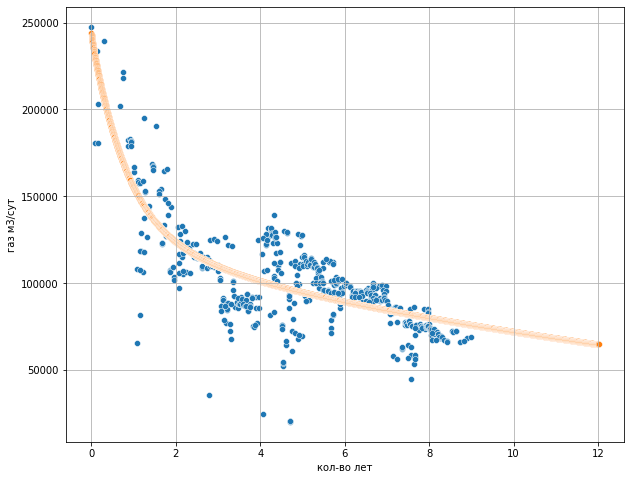

In [ ]:
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=Gaz_full['дата'], y=y_full)

In [ ]:
print('газ м3/сут сегодня:', y_full[-1].round(3))

газ м3/сут сегодня: 64837.84


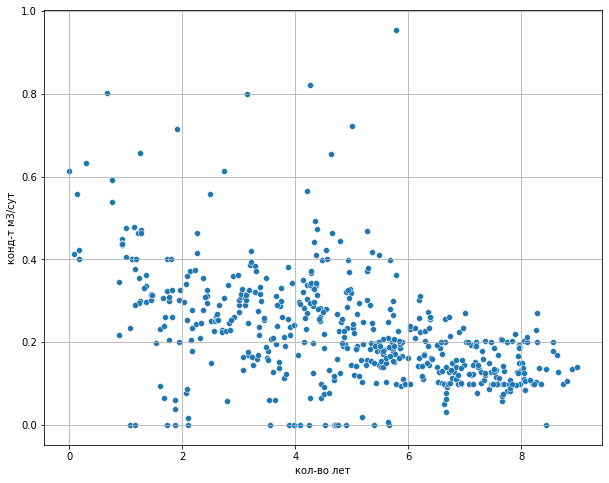

In [ ]:
X = GAZ[['кол-во лет']].copy()
y = GAZ['конд-т м3/сут'].copy()
sns.scatterplot(x=X['кол-во лет'], y=y);

In [ ]:
X['exp'] = np.exp(-X['кол-во лет'])  
X['qrt'] = np.sqrt(X['кол-во лет'])
X['tan'] = np.tanh(X['кол-во лет'])

0.27938033883629576


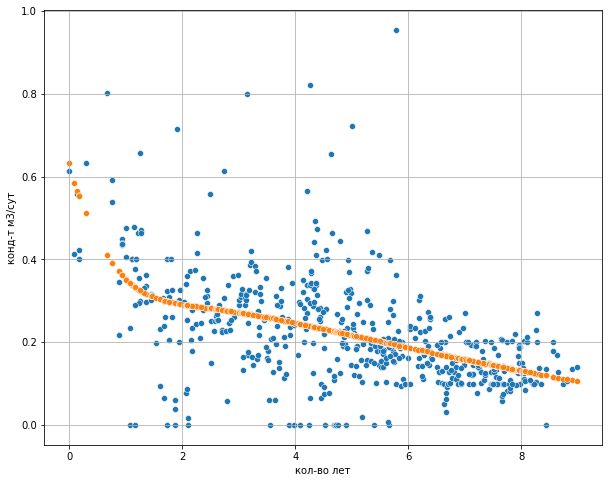

In [ ]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X[['exp', 'tan', 'qrt']], y)
print(lr.score(X[['exp', 'tan', 'qrt']], y))
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=X['кол-во лет'], y=lr.predict(X[['exp', 'tan', 'qrt']]))

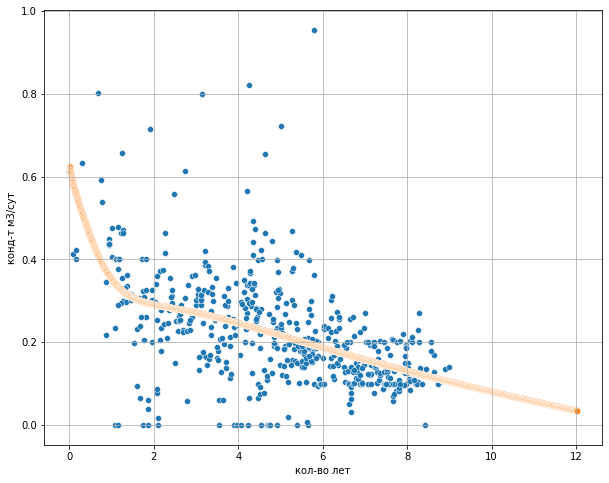

In [ ]:
y_full = lr.predict(Gaz_full[['exp', 'tan', 'qrt']])
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=Gaz_full['дата'], y=y_full)

In [ ]:
print('конд-т м3/сут сегодня:', y_full[-1].round(3))

конд-т м3/сут сегодня: 0.035


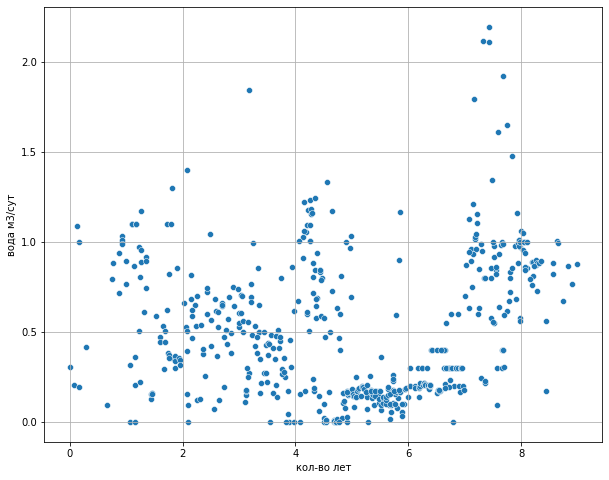

In [ ]:
X = GAZ[['кол-во лет']].copy()
y = GAZ['вода м3/сут'].copy()
sns.scatterplot(x=X['кол-во лет'], y=y)

In [ ]:
X['qrt'] = np.sqrt(X['кол-во лет'])
X['tan'] = np.tanh(X['кол-во лет'])
X['cub'] = X['кол-во лет'] ** 3
X['co'] = np.cos(X['кол-во лет'])

0.0525468061298342


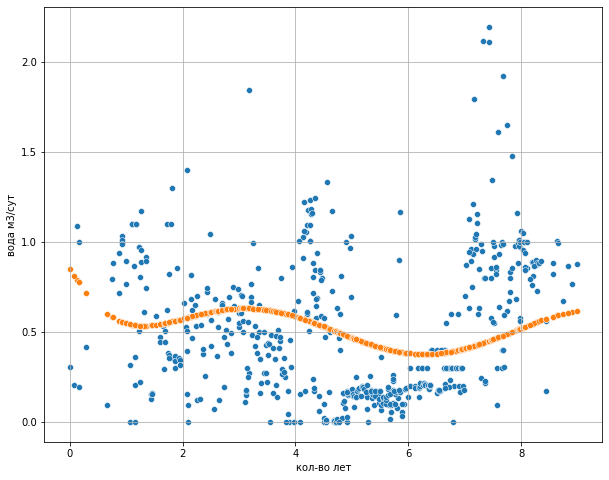

In [ ]:
Gaz_full['in'] = np.sinh(Gaz_full['дата'])
lr = LinearRegression(n_jobs=-1)
lr.fit(X[['tan', 'qrt', 'co']], y)
print(lr.score(X[['tan','qrt', 'co']], y))
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=X['кол-во лет'], y=lr.predict(X[['tan', 'qrt', 'co']]))

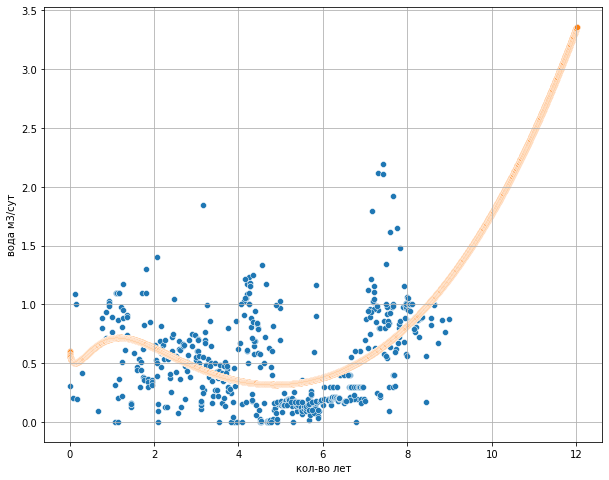

In [ ]:
Gaz_full['co'] = np.cos(Gaz_full['дата'])
y_full = lr.predict(Gaz_full[['tan', 'qrt', 'cub']])
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=Gaz_full['дата'], y=y_full)

In [ ]:
print('вода м3/сут сегодня:', y_full[-1].round(3))

вода м3/сут сегодня: 2.816


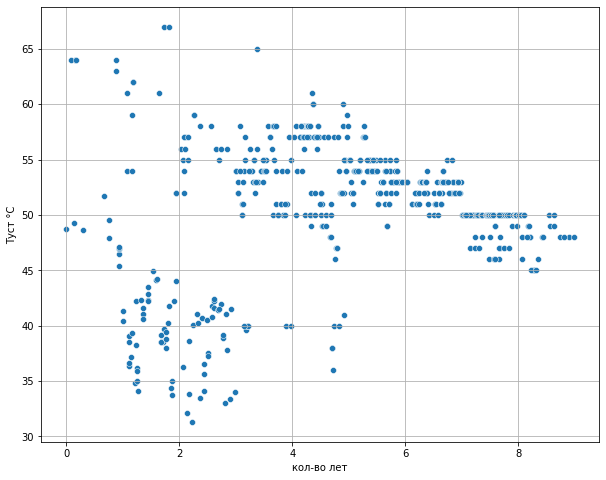

In [ ]:
X = GAZ[['кол-во лет']].copy()
y = GAZ['Туст °С'].copy()
sns.scatterplot(x=X['кол-во лет'], y=y)

In [ ]:
X['exp'] = np.exp(-X['кол-во лет'])  
X['co'] = 1 / np.cosh(X['кол-во лет'])
X['cub'] = X['кол-во лет'] ** 3
X['tan'] = np.tanh(X['кол-во лет'])

0.2502207256163925


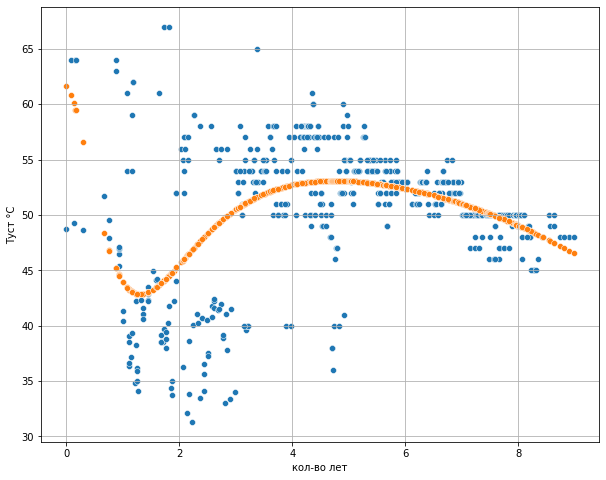

In [ ]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X[['exp', 'tan', 'cub']], y)
print(lr.score(X[['exp', 'tan', 'cub']], y))
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=X['кол-во лет'], y=lr.predict(X[['exp', 'tan', 'cub']]))

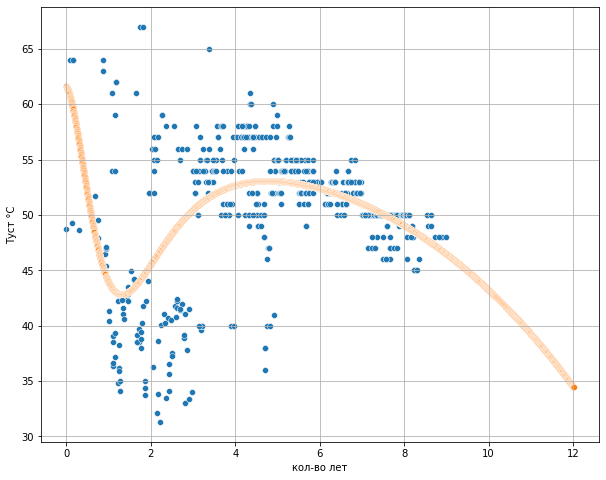

In [ ]:
y_full = lr.predict(Gaz_full[['exp', 'tan', 'cub']])
sns.scatterplot(x=X['кол-во лет'], y=y)
sns.scatterplot(x=Gaz_full['дата'], y=y_full)

In [ ]:
print('Туст °С сегодня:', y_full[-1].round(3))

Туст °С сегодня: 34.441


## **Задача №2. California Housing, прогнозирование цен на квартирные дома**

В задании требуется построить лучшую модель для прогнозирования средней цены дома на основе имеющихся признаков

In [ ]:
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

print(f"Размер тренировочной выборки {train_data.shape}")
print(f"Размер тестовой выборки {test_data.shape}")

Размер тренировочной выборки (17000, 9)
Размер тестовой выборки (3000, 9)


In [ ]:
# Train и Test
y_train = train_data["median_house_value"]
y_test = test_data["median_house_value"]
X_train = train_data.iloc[:,:-1]
X_test = test_data.iloc[:,:-1]
names = X_train.columns

1. Построить модель линейной регрессии на основе исходной таблицы параметров и оценить её качество на тестовой подвыборке


In [ ]:
lin_reg = LinearRegression().fit(X_train, y_train)
round(lin_reg.score(X_train, y_train), 2), round(lin_reg.score(X_test, y_test), 2)

(0.66, 0.64)

2. Провести генерацию новых нелинейных признаков на основе исходных переменных для улучшения качества модели линейной регрессии


In [ ]:
import random 
X_train['new'] = (X_train['total_bedrooms'] * (X_train['total_rooms'] ** (1./4.))  + 89.679)
X_test['new'] = (X_test['total_bedrooms'] * (X_test['total_rooms'] ** (1./4.))  + 89.679) 

X_train['n1'] =  X_train['total_bedrooms'] + X_train['total_rooms'] 
X_test['n1'] = X_test['total_bedrooms'] + X_test['total_rooms'] 

X_train['n2'] =  X_train['total_bedrooms'] * X_train['population'] / X_train['total_rooms']
X_test['n2'] = X_test['total_bedrooms'] * X_test['population'] / X_test['total_rooms'] 

X_train['n3'] =  X_train['households'] * X_train['total_rooms'] / X_train['population']
X_test['n3'] = X_test['households'] * X_test['total_rooms'] / X_test['population']  

X_train['n4'] =  X_train['total_rooms'] / X_train['households'] / X_train['population']
X_test['n4'] = X_test['total_rooms'] / X_test['households'] / X_test['population']  


In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,new,n1
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,11194.359609,6895.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,17868.275593,9551.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,991.005982,894.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,2187.290590,1838.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,2102.748189,1780.0
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,2793.249165,2611.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,3765.502727,2877.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,3909.179875,3208.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,4058.378269,3224.0


In [ ]:
X_train.corr().style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,new,n1,n2,n3,n4
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,0.065248,0.051531,0.125222,0.017046,-0.016425
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.059364,-0.044162,-0.143645,-0.014607,0.051010
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,-0.317998,-0.357910,-0.207759,-0.322789,-0.006672
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.952099,0.998150,0.663369,0.941319,-0.076279
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.985346,0.949277,0.824041,0.922550,-0.084060
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,0.883537,0.872092,0.908473,0.717450,-0.104852
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.967464,0.938213,0.842606,0.899345,-0.106512
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.031396,0.163133,-0.195548,0.164228,0.009482
new,0.065248,-0.059364,-0.317998,0.952099,0.985346,0.883537,0.967464,0.031396,1.000000,0.966931,0.786025,0.929676,-0.068078
n1,0.051531,-0.044162,-0.357910,0.998150,0.949277,0.872092,0.938213,0.163133,0.966931,1.000000,0.696203,0.947534,-0.078305


3. На онове линейной модели с перечнем сгененированных столбцов из пунтка 2 с помощью метода $Lasso$ или $Ridge$ регрессии подобрать параметр регуляризации  для получения лучшей модели на тестовых данных.


In [ ]:
model_LASSO_cv = LassoCV(eps = 0.0000005, n_alphas = 3000, cv = 7, random_state = 100, n_jobs = -1).fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183298442077.125, tolerance: 20373550963.461716
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 656802141789.0, tolerance: 20373550963.461716
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1075720333087.4062, tolerance: 20373550963.461716
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142488403668

In [ ]:
round(model_LASSO_cv.score(X_train, y_train), 2)

0.66

4. Привести лучшую модель, дающую лучший коэффициент детерминации на тестовой выборке

In [ ]:
round(model_LASSO_cv.score(X_test, y_test), 2)

0.64

## ***Задача №4. Регрессия финансовых данных**

Для прогнозирования предоставляются биржевые данные цен акций компании **Apple**. 

**Задание**: спрогнозировать данные **$Close\ -$** цены закрытия на следующую временную отметку $t+1$, при условии что данные заканчиваются на отметке $t$.

То есть необходимо разработать метод оценки $$\hat{y}(x_{t+1}) \approx y(x_{t + 1})$$

Оценку работы модели проводить на отложенных данных в пропорции 95% в третировочной выборке и 5% в тестовой.
Выборку необходимо делить без случайного перемешивания, соблюдая временную последовательность.

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
tickers = "AAPL"
data = yf.download(tickers, interval="5m", period="60d")

[*********************100%***********************]  1 of 1 completed


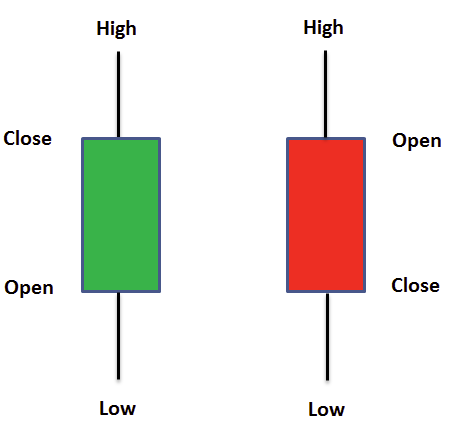

In [ ]:
from datetime import datetime, timedelta

date = data.index
data[date[-2] + timedelta(minutes=5)

Timestamp('2022-12-15 12:35:00')

In [ ]:
sum(data['Close'] == data['Adj Close'])

4596

In [ ]:
Y = data[['Close']] 
X = data.drop(['Close', 'Adj Close'], axis=1)

In [ ]:
X

,Open,High,Low,Volume
Datetime,,,,
2022-09-22 09:30:00,152.380005,153.470001,152.149994,4562057
2022-09-22 09:35:00,153.250000,153.520004,152.710007,2257952
2022-09-22 09:40:00,152.750000,152.785004,152.205002,1735290
2022-09-22 09:45:00,152.250000,152.679993,152.169006,1679454
2022-09-22 09:50:00,152.000000,152.445007,151.669998,2870910
...,...,...,...,...
2022-12-15 12:15:00,138.089996,138.227707,138.003403,440228
2022-12-15 12:20:00,138.130005,138.139999,137.820007,659920
2022-12-15 12:25:00,137.809998,137.994995,137.809998,543847


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, shuffle=False)

In [ ]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9973301000871096

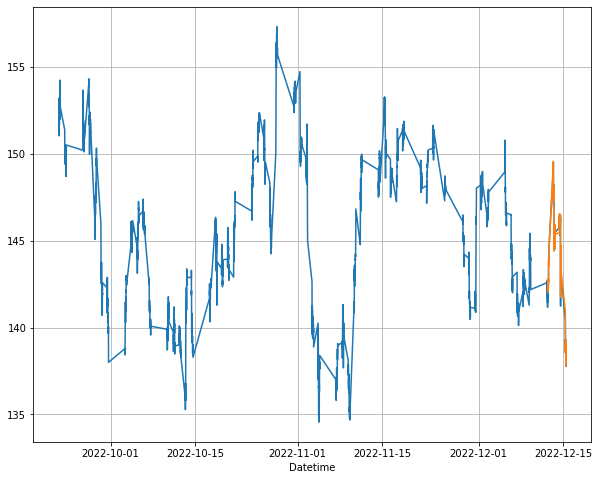

In [ ]:
sns.lineplot(x=X.index, y=Y['Close'].to_numpy().reshape(-1, ))
sns.lineplot(x=X_test.index, y=lr.predict(X_test).reshape(-1, ))

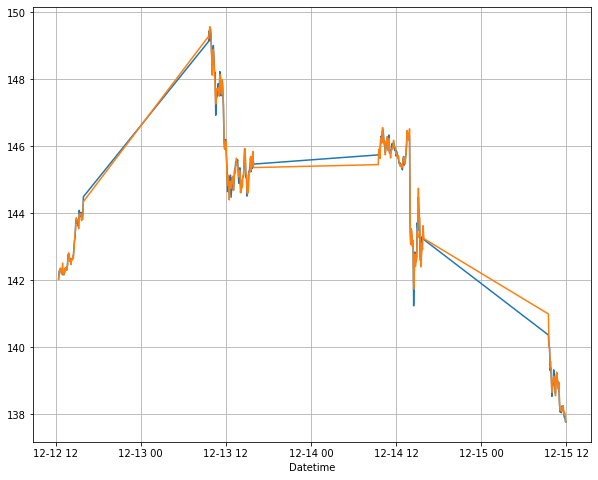

In [ ]:
sns.lineplot(x=X_test.index, y=y_test.to_numpy().reshape(-1, ))
sns.lineplot(x=X_test.index, y=lr.predict(X_test).reshape(-1, ))